# Part I - (Ford GoBike System Data)
## by (ANAH SUNDAY CHUKWUJEKWU)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area , the dataset consists of 183,412 rows and 16 columns. the columns are namely ( duration_sec, start_time, end_time, start_station_is, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
# load the dataset using the pandas read csv
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


* The data is untidy and lacks quality
* presence of columns with wrong data types
* presence of null values in the dataset


In [6]:
#drop the null values and piping it into a new dataframe
df_clean = df
df_clean.dropna(inplace = True)

In [7]:
# change the datatypes of the columns
# change the start and end time to date time format
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])


In [8]:
#convert the start , bike and end station id to string format
df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['bike_id'] = df_clean['bike_id'].astype('str')

In [9]:
# convert the columns to category data type
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

In [10]:
# convert column to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

### TEST

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), obj

In [12]:
# create the age column by substracting the the birth year from the current date
now = datetime.datetime.now().year
df_clean['age'] = now - df_clean['member_birth_year']

In [13]:
# check for the corrections
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,63


In [14]:
# create the year , month and day of week column from the start time column
df_clean['start_year'] = pd.to_datetime(df_clean['start_time']).dt.strftime('%Y')
df_clean['start_month'] = pd.to_datetime(df_clean['start_time']).dt.strftime('%B')
df_clean['start_day_of_week'] = pd.to_datetime(df_clean['start_time']).dt.strftime('%A')

In [15]:
#create the start and end hour of the day column from the start and end time columns
df_clean['start_hour_of_day'] = df_clean['start_time'].dt.strftime('%I %p')
df_clean['end_hour_of_day'] = df_clean['end_time'].dt.strftime('%I %p')

In [16]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_year,start_month,start_day_of_week,start_hour_of_day,end_hour_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,38,2019,February,Thursday,05 PM,08 AM
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,50,2019,February,Thursday,12 PM,05 AM
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,33,2019,February,Thursday,05 PM,04 AM
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,48,2019,February,Thursday,11 PM,12 AM
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,63,2019,February,Thursday,11 PM,12 AM


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
age                        174952 non-null int64
start_year      

In [18]:
df_clean['start_month']

0         February
2         February
3         February
4         February
5         February
6         February
7         February
8         February
9         February
10        February
11        February
12        February
14        February
15        February
16        February
17        February
18        February
19        February
20        February
21        February
22        February
23        February
24        February
25        February
26        February
27        February
29        February
30        February
31        February
32        February
            ...   
183381    February
183382    February
183383    February
183384    February
183385    February
183386    February
183387    February
183388    February
183389    February
183390    February
183391    February
183392    February
183393    February
183394    February
183395    February
183396    February
183397    February
183398    February
183399    February
183400    February
183401    February
183403    Fe

In [19]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,37.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,21.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,30.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,35.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,42.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,144.000000


### What is the structure of your dataset?

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area , the dataset consists of 174,192 rows and 16 columns. the columns are namely ( duration_sec, start_time, end_time, start_station_is, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, age)

### What is/are the main feature(s) of interest in your dataset?

* When are most trips taken in terms of time of day, day of the week?

* How long does the average trip take?

* Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- The duration of the rides taken by riders.
- The relationship between the user type and the number of rides taken

## Univariate Exploration

In [59]:
# set defined color for plots
basecolor = sb.color_palette()[0]
hour_order = ['12 AM','01 AM','02 AM','03 AM','04 AM','05 AM','06 AM','07 AM','08 AM','09 AM','10 AM','11 AM',
         '12 PM','01 PM','02 PM','03 PM','04 PM','05 PM','06 PM','07 PM','08 PM','09 PM','10 PM','11 PM']
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [57]:
# define the function to aid easy creation of multiple count plots 
def plotcount(df, xVar,color = basecolor, order = None, figsize=[14,6]):
    '''
    docstring: the function returns a seaborn countplot well titled and labelled.
    input : it takes in the dataframe and the variable on the xaxis as well as any other needed arguments
    output : a count plot
    '''
    #the plot
    sb.countplot(data = df , x = xVar, edgecolor = 'black', color = color, order = order);
    # extract the name of the variable to a format suited for a title
    xVar=xVar.replace('_',' ')
    # format the chart title and labels
    plt.title(f''' Distribution of {xVar}'''.title(),fontsize = 14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')
    

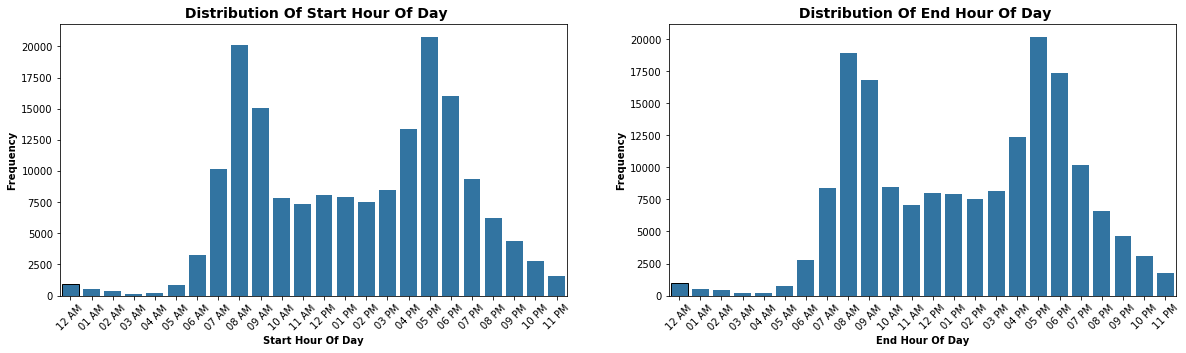

In [55]:
plt.figure(figsize = [20,5])
# charting the trip start hours on a bar
plt.subplot(1,2,1)

plotcount(df_clean, 'start_hour_of_day', order = hour_order, figsize = None)
plt.xticks(rotation = 45)

#charting the trips end hours on a bar 
plt.subplot(1,2,2)
plotcount(df_clean, 'end_hour_of_day', order = hour_order, figsize = None)
plt.xticks(rotation = 45);

Both distribution based on the trips taken by time of day showed that 8am and 5pm recorded peak number of trips on the platform as well as high number of trips ending within those time periods.

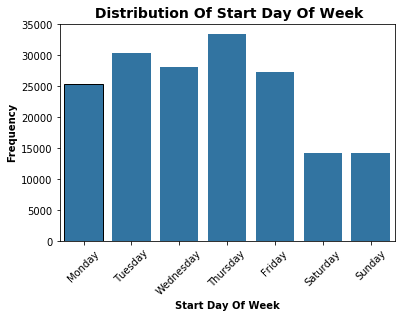

In [60]:
# chart the distribution of the trips by the weekday
plotcount(df_clean, 'start_day_of_week', color = basecolor, order = weekday)
plt.xticks(rotation = 45);

Thurday accounted for the most trips undertaken on the platform, rising from monday before plateauing on saturday and sunday

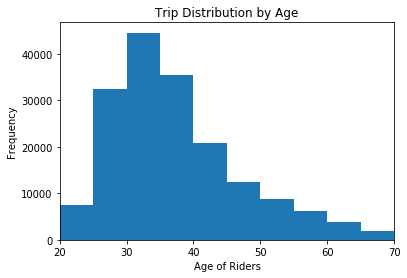

In [23]:
#charting the age distribution on a standard scale
binsize = 5
bins = np.arange(20, df_clean['age'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'age', bins = bins)
plt.title('Trip Distribution by Age')
plt.xticks([20,30,40,50,60,70,80])
plt.xlim([20,70])
plt.xlabel('Age of Riders')
plt.ylabel('Frequency');

* Charting the trip duration by age on a standard scaled histogram showed a highly left skewed distribution.
* the distribution is unimodal having a peak for riders between the ages of 30 to 40 years

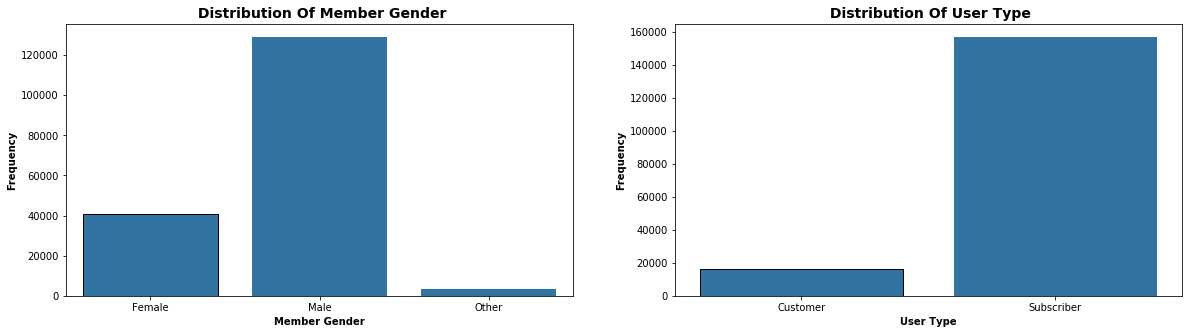

In [61]:
#charting the distribution of trips based on gender
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
plotcount(df_clean, 'member_gender', color = basecolor, figsize = None)
#charting of trips based on membership type
plt.subplot(1,2,2)
plotcount(df_clean, 'user_type', color = basecolor, figsize = None);

* From the visualization it can be seen that male riders account for the bulk of bike rides on the platform followed by females and other genders accounting for the least in the dataset.
* It can be deduced from the visual that members account for the largest share in the number of rides taken as opposed to casual customers who account for lesser
* Looking ahead to checking the relationship between the day of the week and time of the day casual and members start their trips.

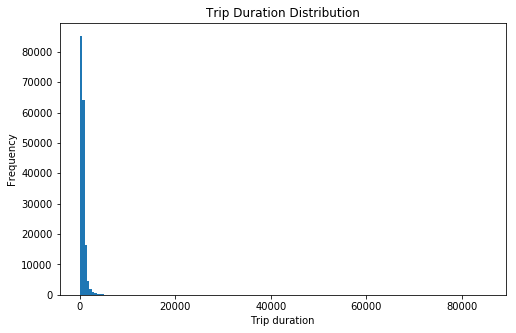

In [25]:
binsize = 500
plt.figure(figsize = [8,5])
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip duration')
plt.ylabel('Frequency');

* The visual shows a highly left skewed distribution when charted on the standard scale
* to obtain more insights, normalizing the distribution using scale transaformation becomes imperative.

In [26]:
#taking a log of the decription of the dataset
np.log10(df_clean.describe())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age
count,5.242919,5.242919,5.242919,5.242919,5.242919,5.242919,5.242919
mean,2.847574,1.577161,NaN,1.577163,NaN,3.297717,1.570506
std,3.215427,-0.998305,-0.929106,-0.998719,-0.930723,1.005126,1.005126
min,1.785330,1.571910,NaN,1.571910,NaN,3.273696,1.322219
25%,2.509203,1.577152,NaN,1.577152,NaN,3.296665,1.477121
50%,2.707570,1.577271,NaN,1.577274,NaN,3.298198,1.544068
75%,2.897077,1.577461,NaN,1.577465,NaN,3.299289,1.623249
max,4.927103,1.578413,NaN,1.578413,NaN,3.301247,2.158362


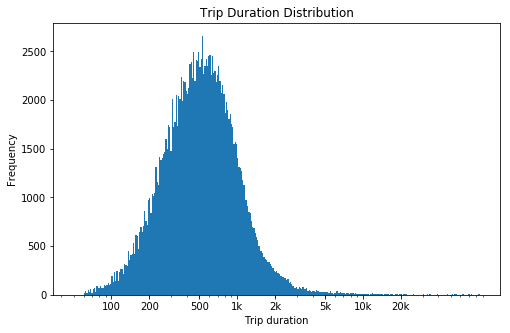

In [27]:
#charting the trip duration on a log scale
logbinsize = 0.01
plt.figure(figsize = [8,5])
bins = 10** np.arange(1.7, np.log10(df_clean['duration_sec'].max())+logbinsize, logbinsize)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([1e2, 2e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4], [100, 200, 500, '1k', '2k', '5k', '10k', '20k'])
plt.title('Trip Duration Distribution')
plt.xlabel('Trip duration')
plt.ylabel('Frequency');

* From the visual it can be deduced that a bulk of the trips lasted between 100 secc to 2000 secs with trips peaking around range 300 to 1000 seconds.
* 500 secs happen to be the singular peak for the distribution

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* From charting the trip start time by hour, it is seen that there spike in rides from 7-8am and another spike between 5-6pm which the former can be guessed to be due to people heading to work and the later due to people leaving work.
* saturday and sunday accounted for the days with the least trips in the distribution , showing that maybe riders typically took the bikes for work.
* I transformed the scale for the trip duration axis to a log scale for easier investigation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
* charting the age column showed a left skewed unimodal distribution with a peak between the ages of 30-40.
* when charting the trip duration after long transformation of the scale showed a normal distribution peaking at 500 secs
* I removed null values , changed data types for some of the columns while creating some new columns such as [age, start hour, end hour etc]


## Bivariate Exploration

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
age                        174952 non-null int64
start_year      

In [29]:
# drop non needed rows and columns
df_clean.drop(columns = ['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude'], axis = 1, inplace = True)

In [30]:
df_clean.describe(percentiles = [.99])

,duration_sec,member_birth_year,age
count,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,37.196865
std,1642.204905,10.118731,10.118731
min,61.000000,1878.000000,21.000000
50%,510.000000,1987.000000,35.000000
99%,3176.000000,1999.000000,67.000000
max,84548.000000,2001.000000,144.000000


* From the above it can be seen that 99% of all ages lie between the ages of 21 to 67 years.
* So its safe to say that the 144 year old value is an error as such should be dropped from the dataframe

In [31]:
df_clean.drop(df_clean[df_clean.age > 67].index, inplace = True)

### Test

In [32]:
df_clean.describe()

,duration_sec,member_birth_year,age
count,173272.000000,173272.000000,173272.000000
mean,703.878549,1985.171747,36.828253
std,1647.305625,9.378430,9.378430
min,61.000000,1955.000000,21.000000
25%,323.000000,1980.000000,30.000000
50%,510.000000,1987.000000,35.000000
75%,788.000000,1992.000000,42.000000
max,84548.000000,2001.000000,67.000000


In [33]:
# create column duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60

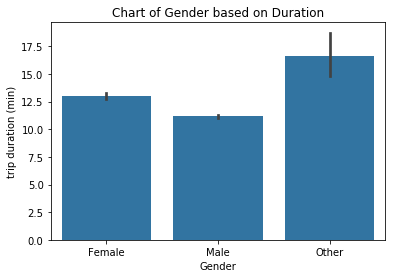

In [34]:
#Relationship between age and gender
sb.barplot(data = df_clean , x = 'member_gender', y = 'duration_min', color = basecolor)
plt.title('Chart of Gender based on Duration')
plt.ylabel('trip duration (min)')
plt.xlabel('Gender');

* From the visuals, it can be deduced that even though the male gender accounted for a large number of riders on the platform, it accounted for the shortest trips embarked on the platform as compared to females who took longer trips and other genders accounting for the most on the platform.

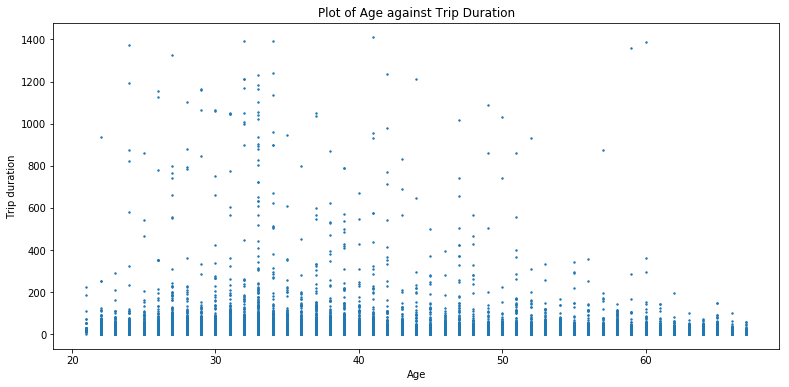

In [76]:
#relationship between age and duration in minutes
plt.figure(figsize = [13,6])
plt.scatter(data = df_clean , x = 'age', y = 'duration_min', s = 2)
plt.title('Plot of Age against Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip duration');

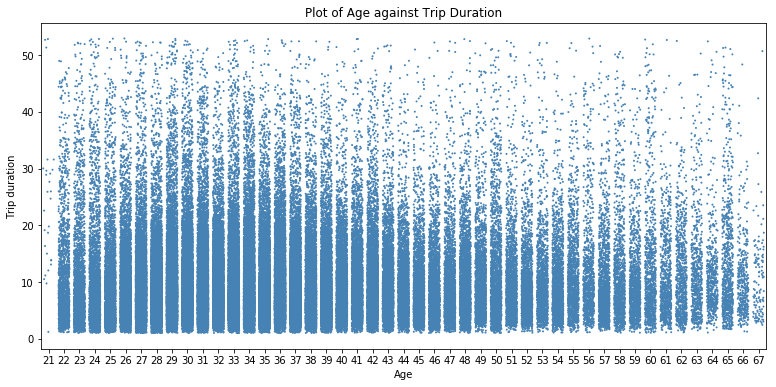

In [87]:
# stripping off the outliers for a more in depth look at the values
plt.figure(figsize = [13,6])
sb.stripplot(data = df_clean.query('duration_min<duration_min.quantile(0.99)') , x = 'age', y = 'duration_min',s = 2,
            color = 'steelblue', jitter = 0.35)
plt.title('Plot of Age against Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip duration');

Outside a few outliers, it can be deduced that there is a negative correlation between the length of the trips on the platform and the age of the riders, with younger riders more inclined to undertake longer trips as compared to the older riders.

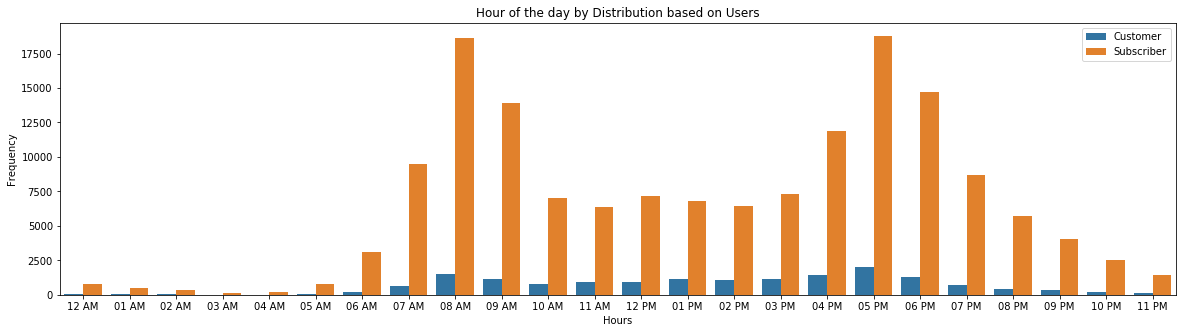

In [68]:
#relationship between start hour and user type
plt.figure(figsize = [20,5])
sb.countplot(data = df_clean , x = 'start_hour_of_day',order = order, hue = 'user_type')
plt.title('Hour of the day by Distribution based on Users')
plt.xlabel('Hours')
plt.legend()
plt.ylabel('Frequency');

It can be seen that the platform members demand on the platform starts around 3am and rises slowly before peaking around 8am, then it drops slowly till noon before rising till it gets to a second peak around 5pm before gently tailing off to end the daily cycle.
For casual users, demand starts a bit later around 6am before peaking around 8am, drops gently around 10am before remaing steady till noon before rising till a second peak at 5pm before tailing off to complete the cycle.

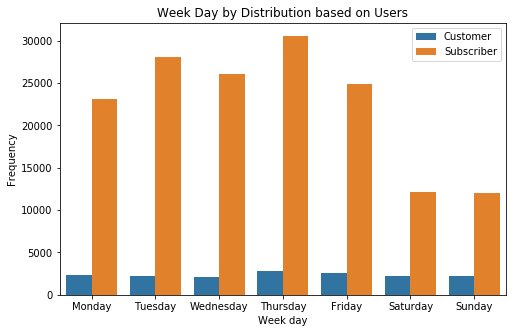

In [69]:
#relationship between day of week and user type
plt.figure(figsize = [8,5])
sb.countplot(data = df_clean , x = 'start_day_of_week', hue = 'user_type', order = weekday)
plt.title('Week Day by Distribution based on Users')
plt.xlabel('Week day')
plt.ylabel('Frequency')
plt.legend();

It is noticed that theres is a gently spike in rider activity on the platform starting on monday before peaking on thursday before tailing off before hitting a plateau around saturday and sunday.
whilst for the casual customers, it more or less even except for a gentle spike in activity on thursdays.

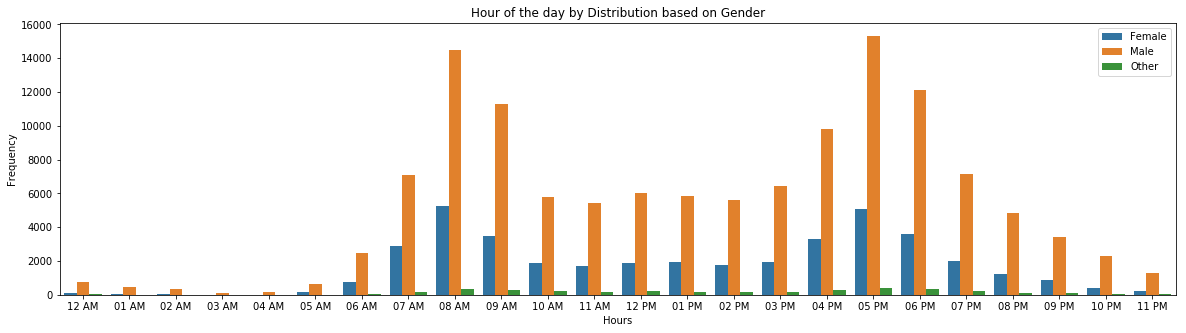

In [38]:
# relationship between hour of day and gender
plt.figure(figsize = [20,5])
order = ['12 AM','01 AM','02 AM','03 AM','04 AM','05 AM','06 AM','07 AM','08 AM','09 AM','10 AM','11 AM','12 PM','01 PM','02 PM','03 PM','04 PM','05 PM','06 PM','07 PM','08 PM','09 PM','10 PM','11 PM']
sb.countplot(data = df_clean , x = 'start_hour_of_day',order = order, hue = 'member_gender')
plt.title('Hour of the day by Distribution based on Gender')
plt.xlabel('Hours')
plt.legend()
plt.ylabel('Frequency');

all genders comformed to the notion of increased ride activity on the platform around the hours of 8 AM and another at 5 PM.

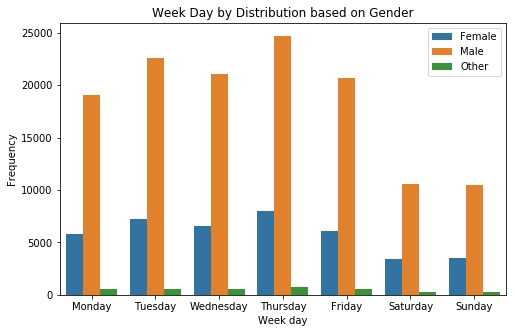

In [39]:
#relationship between day of week and user type
plt.figure(figsize = [8,5])
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data = df_clean , x = 'start_day_of_week', hue = 'member_gender', order = weekday)
plt.title('Week Day by Distribution based on Gender')
plt.xlabel('Week day')
plt.ylabel('Frequency')
plt.legend();

All riders irrespective of genders leaned towards higher ride activity on thursdays, compared to other days, with trips activity plateauing on saturday and sunday.


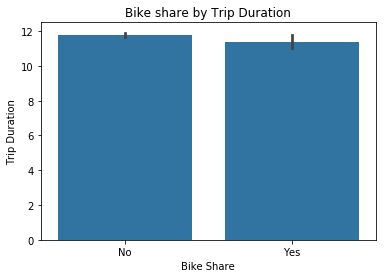

In [40]:
# relationship between trip duration in minutes and bike share
sb.barplot(data = df_clean , x = 'bike_share_for_all_trip', y = 'duration_min', color = basecolor)
plt.title('Bike share by Trip Duration')
plt.xlabel('Bike Share')
plt.ylabel('Trip Duration');

It can be deduced that none shared rides were longer trips compared to shared trips

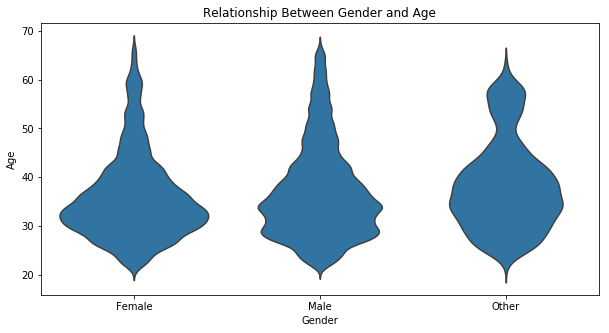

In [41]:
#relationship between gender and age
plt.figure(figsize=[10,5])
sb.violinplot(data = df_clean , x = 'member_gender', y = 'age', color = basecolor, inner = None)
plt.title('Relationship Between Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Age');

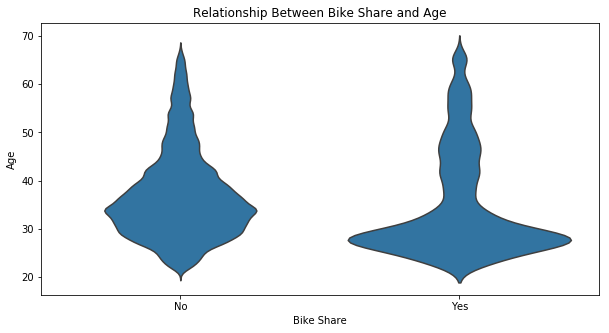

In [42]:
#relationship between share trip and age
plt.figure(figsize=[10,5])
sb.violinplot(data = df_clean , x = 'bike_share_for_all_trip', y = 'age', color = basecolor, inner = None)
plt.title('Relationship Between Bike Share and Age')
plt.xlabel('Bike Share')
plt.ylabel('Age');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- From the visuals, even though the male genders accounted for a bulk of those who  rides on the platform, yet other gender accounted for the highest duration spent riding, followed by the female gender with the male gender was the least.
- investigating the relationship between the genders and the time of day and day of week showed that irrespective of genders showed a peak activity on the platform by 8am and another peak by 5pm reinforcing the notion that the peaks were as a result of the users going to work or coming back from work.
- investigating the relationship between user type and the hours of the day reinforced the above notion about peak hours. thursdays still is the most active day by any demographic, further investigation will need to be done to kmow why, maybe there's increased traffic in the city on thursdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- It is interesting to note that younger users below the ages of 30, tend to like to share rides, compared to older users.

## Multivariate Exploration


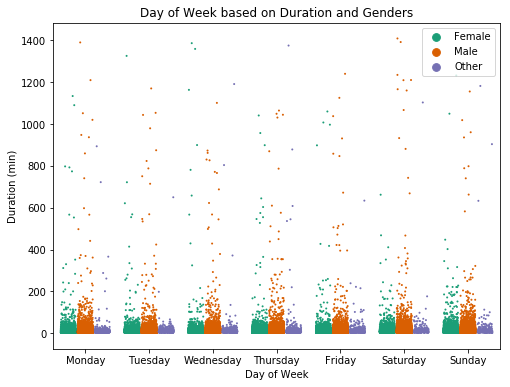

In [72]:
#relationship between day of the week , gender and duration in seconds
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean, x = 'start_day_of_week', y = 'duration_min', hue = 'member_gender',
           palette = 'Dark2', jitter = 0.35, dodge = True, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Genders')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);

 The presence of outliers skews the data visuals a bit

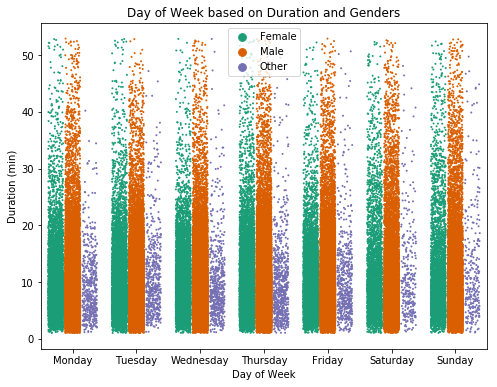

In [77]:
#striping off the outliers for a closer look at the relationship
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean.query('duration_min<duration_min.quantile(0.99)') , x = 'start_day_of_week', y = 'duration_min', hue = 'member_gender',
           palette = 'Dark2', jitter = 0.35, dodge = True, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Genders')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);

Male riders while accounting for the bulk of users on the platform also did longer trips compared to other genders, with the length of trips generally increasing as we get to saturday and sunday, a notion that also resonates with female riders

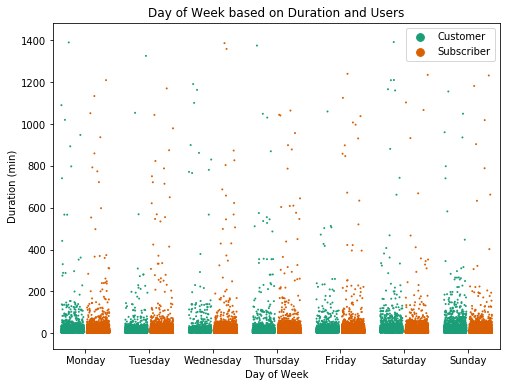

In [73]:
#relationship between day of the week , user and duration in seconds
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean, x = 'start_day_of_week', y = 'duration_min', hue = 'user_type',
           palette = 'Dark2', dodge = True, jitter = 0.35, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Users')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);

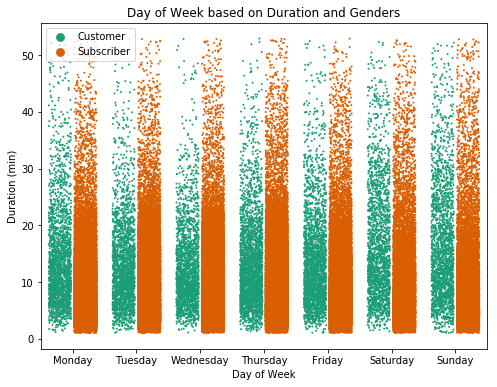

In [78]:
#striping off the outliers for a closer look at the relationship
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_clean.query('duration_min<duration_min.quantile(0.99)') , x = 'start_day_of_week', y = 'duration_min', hue = 'user_type',
           palette = 'Dark2', jitter = 0.35, dodge = True, size = 2, order = weekday)
plt.title('Day of Week based on Duration and Genders')
plt.ylabel('Duration (min)')
plt.xlabel('Day of Week')
plt.legend()
ax.set_yticklabels([],minor = True);

The length of trips by users generally seem to increase as one approaches the weekends and this also rings through when checking the relationship on the basis of the users of the platform, it its for pronounced for casual users who generally took longer trips during the weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- casual customers took longer riders compared to actual members of the platform.

### Were there any interesting or surprising interactions between features?

- I noticed that even though saturday and sunday accounted for the least number of trips taken by riders, sunday showed the lengthiest trips taken on the platform.

## Conclusions
- From the visualizations , the ride data shows that the peak hours are 8 am and 5 pm showing that the riders typically utilize the bikes to ferry to and from work. and thursday being a very active day in the city for the platform.
- Male riders are the most frequent users of the platform.
- subcribers account for a large number of users on the platform with the length of their trips spread out on the individual days of the week. with casual users having a slightly noticeable spike in platform usaage for long trips during the weekends.
